In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from numpy.lib.function_base import gradient

[1415.0615659918226]
67.06710629530123
10000


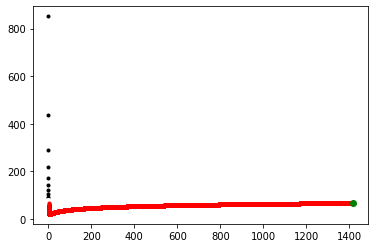

In [2]:
from numpy.core.fromnumeric import resize

X=[1,2,3,3,7,3,5,4,6,2,4]

XX=np.zeros(len(X))
for it, th in enumerate(X):
    XX[it]=X[it]**2


Xlog=np.zeros(len(X))
for it, th in enumerate(X):
    Xlog[it]=np.log(X[it])


Slx=sum(Xlog)
Sxx=sum(XX)

N=len(X)
func = lambda th: 11*np.log(th[0])-12.80 + 178/(2*th[0])

#Representacion 

_x =np.linspace(0.1,9, 100)
_y=np.zeros(100)
for ix, x in enumerate(_x):
  _y[ix]=func([x])

plt.plot(_x,_y, ".", c = "black")

#Algoritmo Adam
Theta = [1]
Thetaold=[0]
lr=0.1
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],func(Theta), "o", c = "white")

grad=np.zeros(1)
m=[0]
v=[0]
M=np.zeros(1)
V=np.zeros(1)
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-20:
    break
  else:
    grad[0] = N/Theta[0] - Sxx/2*Theta[0]**2
  #print(grad)

    for it, th in enumerate(Theta):
      m[it]= b1*m[it] + (1-b1)* grad[it]
      v[it]= b2*v[it] + (1-b2)* grad[it]**2
    #print(v)

    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):
      M[it]= m[it]/(1-b1k)
      V[it]= v[it]/(1-b2k)
    #print(V)

    for it, th in enumerate(Theta):  
      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - lr * M[it]/ np.sqrt(V[it] + E)
      plt.plot(Theta[0],func(Theta), ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2)
    #print(diferencia)
    contador=contador+1

print(Theta)
print(func(Theta))
print(contador)
plt.plot(Theta[0],func(Theta), "o", c = "green")



plt.show()